In [1]:
import sympy
import math 
import numpy as np
from scipy.optimize import fsolve
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy import optimize

## Interacting Holographic Dark Energy Model (IHDE)
### For the holographic dark energy model with the dark matter interaction, the evolution of the 
### the density parameter is given by 
$$
\frac{d \Omega_{de}}{dz} = \frac{\Omega_{de}(\Omega_{de} -1) }{z+1} \left(1 + \frac{2 \sqrt{\Omega_{de}}}{c} \right) + \frac{Q \Omega_{de}}{(1+z)H\rho_c} - \frac{3 \Omega_{de} \Omega_{eff} \omega_{eff}}{z+1} \,
$$
### for an universe dominated by dark matter and dark energy, the Friedmann constraint is just $\Omega_{de} + \Omega_{d}=1$ 
### and $\Omega_{eff}=0$. Also, if we consider the interaction in the form $Q = 3 b^2 H \rho_c$. The last equation takes the form 
$$
\frac{d \Omega_{de}}{da} = \frac{\Omega_{de}(1-\Omega_{de}) }{a} \left(1 + \frac{2 \sqrt{\Omega_{de}}}{c} \right)- \frac{3 b^2 \Omega_{de}}{a} \,
$$
### for the simple holographic dark energy model (without interaction) is just the case $b = 0$.
$$
\frac{d \Omega_{de}}{da} = \frac{\Omega_{de}(1-\Omega_{de}) }{a} \left(1 + \frac{2 \sqrt{\Omega_{de}}}{c} \right)
$$

In [2]:
#Right hand side of the equations
'''
for c = 0.8
'''
def RHS_a_hde1(Omega, a, c=0.8, b=0):
    dOmega = -Omega*(Omega-1)*(1+ 2*np.sqrt(Omega)/c)/a + 0
    return dOmega

def fun_root1(Omega_0 , c=0.8, Ode0=0.7, b=0.0):
    a_hde = np.linspace(1./(1+2), 1, 300)
    result_a_hde1 = odeint(RHS_a_hde1, Omega_0*10**(-5), a_hde, args=(c,b))
    return result_a_hde1[-1] - Ode0

'''
for c = 0.9 
'''

def RHS_a_hde2(Omega, a, c=0.9, b=0):
    dOmega = -Omega*(Omega-1)*(1+ 2*np.sqrt(Omega)/c)/a + 0
    return dOmega

def fun_root2(Omega_0 , c=0.9, Ode0=0.7, b=0.0):
    a_hde = np.linspace(1./(1+2), 1, 500)
    result_a_hde2 = odeint(RHS_a_hde2, Omega_0*10**(-5), a_hde, args=(c,b))
    return result_a_hde2[-1] - Ode0

'''
for c = 1.0
'''
def RHS_a_hde3(Omega, a, c=1.0, b=0):
    dOmega = -Omega*(Omega-1)*(1+ 2*np.sqrt(Omega)/c)/a + 0
    return dOmega

def fun_root3(Omega_0 , c=1.0, Ode0=0.7, b=0.0):
    a_hde = np.linspace(1./(1+2), 1, 500)
    result_a_hde3 = odeint(RHS_a_hde3, Omega_0*10**(-5), a_hde, args=(c,b))
    return result_a_hde3[-1] - Ode0

'''
c = 1.2
'''
def RHS_a_hde4(Omega, a, c=1.2, b=0):
    dOmega = -Omega*(Omega-1)*(1+ 2*np.sqrt(Omega)/c)/a + 0
    return dOmega

def fun_root4(Omega_0 , c=1.2, Ode0=0.7, b=0.0):
    a_hde = np.linspace(1./(1+2), 1, 500)
    result_a_hde4 = odeint(RHS_a_hde4, Omega_0*10**(-5), a_hde, args=(c,b))
    return result_a_hde4[-1] - Ode0

'''
c = 1.5
'''
def RHS_a_hde5(Omega, a, c=1.5, b=0):
    dOmega = -Omega*(Omega-1)*(1+ 2*np.sqrt(Omega)/c)/a + 0
    return dOmega


def fun_root5(Omega_0 , c=1.5, Ode0=0.7, b=0.0):
    a_hde = np.linspace(1./(1+2), 1, 500)
    result_a_hde5 = odeint(RHS_a_hde5, Omega_0*10**(-5), a_hde, args=(c,b))
    return result_a_hde5[-1] - Ode0



In [3]:

s1 = optimize.newton(fun_root1, 1)
s2 = optimize.newton(fun_root2, 1)
s3 = optimize.newton(fun_root3, 1)
s4 = optimize.newton(fun_root4, 1)
s5 = optimize.newton(fun_root5, 1)

The initial value at z=3 is  0.13381727113948802
The initial value at z=3 is  0.15101620521136416
The initial value at z=3 is  0.16685052960996807
The initial value at z=3 is  0.19468060805968262
The initial value at z=3 is  0.22828332491605624


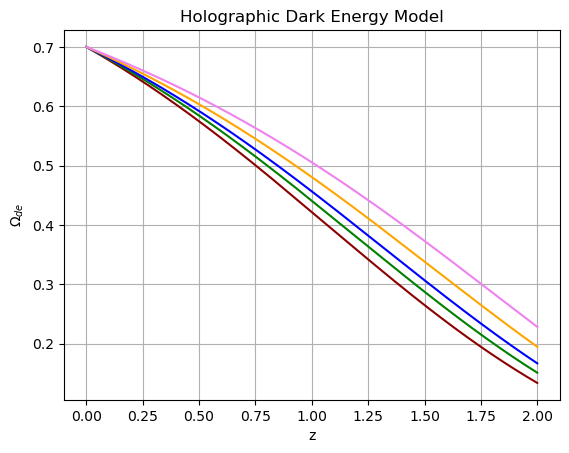

In [4]:
z_eff = np.linspace(2,0,500)

O_hde1 =odeint(RHS_a_hde1, s1*10**(-5), np.linspace(1./(1+2), 1, 500), args=(0.8,0))
O_hde2 =odeint(RHS_a_hde2, s2*10**(-5), np.linspace(1./(1+2), 1, 500), args=(0.9,0))
O_hde3 =odeint(RHS_a_hde3, s3*10**(-5), np.linspace(1./(1+2), 1, 500), args=(1.0,0))
O_hde4 =odeint(RHS_a_hde4, s4*10**(-5), np.linspace(1./(1+2), 1, 500), args=(1.2,0))
O_hde5 =odeint(RHS_a_hde5, s5*10**(-5), np.linspace(1./(1+2), 1, 500), args=(1.5,0))

plt.plot(z_eff,O_hde1,color='darkred',)
plt.plot(z_eff,O_hde2,color='green',)
plt.plot(z_eff,O_hde3,color='blue',)
plt.plot(z_eff,O_hde4,color='orange',)
plt.plot(z_eff,O_hde5,color='violet',)

plt.grid()
plt.xlabel('z')
plt.ylabel('$\Omega_{de}$')
plt.title('Holographic Dark Energy Model')
print('The initial value at z=3 is ', float(O_hde1[0]))
print('The initial value at z=3 is ', float(O_hde2[0]))
print('The initial value at z=3 is ', float(O_hde3[0]))
print('The initial value at z=3 is ', float(O_hde4[0]))
print('The initial value at z=3 is ', float(O_hde5[0]))


In [115]:
c = [0.8,0.9,1.0, 1.2, 1.5]

def modelz_1 (y,z):

    dydz = (y*(y-1)/(z+1))*((2*(np.sqrt(y)))/c[0] + 1) + 0 # using c = 0.8

    return dydz

def modelz_2 (y,z):

    dydz = (y*(y-1)/(z+1))*((2*(np.sqrt(y)))/c[1] + 1) + 0 # using c = 0.8

    return dydz

def modelz_3 (y,z):

    dydz = (y*(y-1)/(z+1))*((2*(np.sqrt(y)))/c[2] + 1) + 0 # using c = 0.8

    return dydz

def modelz_4 (y,z):

    dydz = (y*(y-1)/(z+1))*((2*(np.sqrt(y)))/c[3] + 1) + 0 # using c = 0.8

    return dydz

def modelz_5 (y,z):

    dydz = (y*(y-1)/(z+1))*((2*(np.sqrt(y)))/c[4] + 1) + 0 # using c = 0.8

    return dydz


In [122]:
# Define the initial condition
y0 = 0.7
# Define the redshift interval 
z = np.linspace(0,2,500)


# the solutions for each equation 
solutions = [odeint(modelz_1,y0,z) ,odeint(modelz_2,y0,z),odeint(modelz_3,y0,z),odeint(modelz_4,y0,z),odeint(modelz_5,y0,z)]
O_de1 = solutions[0].reshape(-1)
O_de2 = solutions[1].reshape(-1)
O_de3 = solutions[2].reshape(-1)
O_de4 = solutions[3].reshape(-1)
O_de5 = solutions[4].reshape(-1)


In [106]:
O_hde1_re = O_hde1.reshape(-1)
O_hde2_re = O_hde2.reshape(-1)
O_hde3_re = O_hde3.reshape(-1)
O_hde4_re = O_hde4.reshape(-1)
O_hde5_re = O_hde5.reshape(-1)

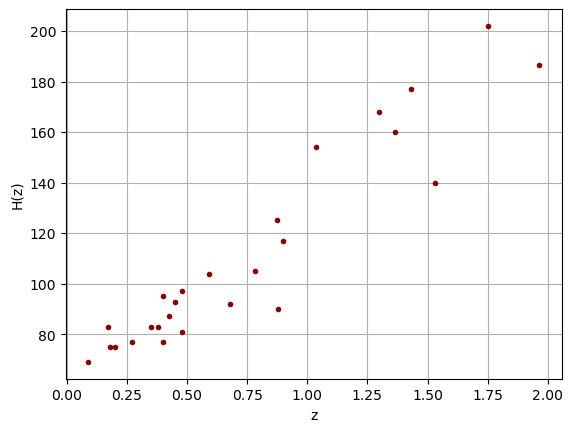

In [5]:
arr_hub = np.loadtxt('Hz_all.dat')
z_obs= arr_hub[:,0]
hub_obs = arr_hub[:,1]
error_obs = arr_hub[:,2]
plt.errorbar(z_obs,hub_obs, ls='', marker='.',color='darkred')
plt.xlabel('z')
plt.ylabel('H(z)')
plt.grid()

In [98]:
'''
Now we define the Hubble paramater for the Holographic model
'''
Om= 0.3
Or= 0.0001
Ok=0.01
Oe= 1 - Om - Or - Ok
H0 = 70
z0 = 3

def RHSquared_a1(a):
     return H0*np.sqrt(Or/a**4 + Om/a**3 + Ok/a**2 +  O_hde1_re)

a1 = np.linspace(1./(1+2),1,500)
Hub_hde1 = RHSquared_a1(a1)

In [104]:
def RHSquared_a2(a):
     return H0*np.sqrt(Or/a**4 + Om/a**3 + Ok/a**2 +  O_hde2_re)


Hub_hde2 = RHSquared_a2(a1)

In [108]:
def RHSquared_a3(a):
     return H0*np.sqrt(Or/a**4 + Om/a**3 + Ok/a**2 +  O_hde3_re)

Hub_hde3 = RHSquared_a3(a1)

In [109]:
def RHSquared_a4(a):
     return H0*np.sqrt(Or/a**4 + Om/a**3 + Ok/a**2 +  O_hde4_re)

Hub_hde4 = RHSquared_a4(a1)

In [110]:
def RHSquared_a5(a):
     return H0*np.sqrt(Or/a**4 + Om/a**3 + Ok/a**2 +  O_hde5_re)

Hub_hde5 = RHSquared_a5(a1)

In [111]:
def hub(z, Ok=0):
    Om= 0.3
    Or= 0.0001
    #Ok=0.01
    Oe= 1 - Om - Or - Ok
    H0 = 70
    
    return H0*np.sqrt( Or*(1+z)**4 + Om*(1+z)**3 + Ok*(1+z)**2 + Oe)


red_z = np.linspace(0, 2, 100)
hubz = hub(red_z)

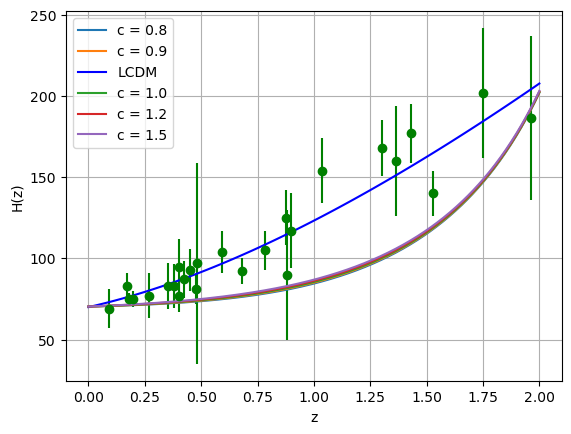

In [112]:
redz = np.linspace(2,0,500)
plt.errorbar(z_obs, hub_obs, error_obs, ls='', marker='o',color='green')
plt.plot(redz,Hub_hde1, label='c = 0.8')
plt.plot(redz,Hub_hde2, label='c = 0.9')
plt.plot(red_z,hubz, label='LCDM',color='blue')
plt.plot(redz,Hub_hde3, label='c = 1.0')
plt.plot(redz,Hub_hde4, label='c = 1.2')
plt.plot(redz,Hub_hde5, label='c = 1.5')
plt.ylabel('H(z)')
plt.xlabel('z')
#plt.plot(redz, hubzc, label='GGC')
plt.legend()
plt.grid()

In [129]:
def RHSquared_z1(z):
     return H0*np.sqrt(Or*(z+1)**4 + Om*(z+1)**3 + Ok*(z+1)**2 +  O_de1)


Hub_hde_z1 = RHSquared_z1(z_ref)

def RHSquared_z2(z):
     return H0*np.sqrt(Or*(z+1)**4 + Om*(z+1)**3 + Ok*(z+1)**2 +  O_de2)

z_ref = np.linspace(0,2,500)

Hub_hde_z2 = RHSquared_z2(z_ref)

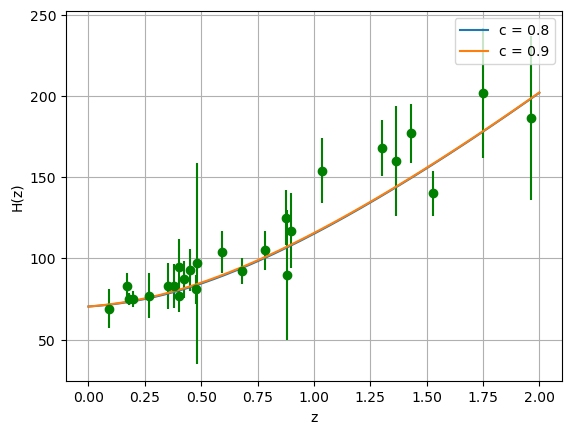

In [131]:
plt.errorbar(z_obs, hub_obs, error_obs, ls='', marker='o',color='green')
plt.plot(z_ref,Hub_hde_z1, label='c = 0.8')
plt.plot(z_ref,Hub_hde_z2, label='c = 0.9')
plt.ylabel('H(z)')
plt.xlabel('z')
#plt.plot(redz, hubzc, label='GGC')
plt.legend()
plt.grid()

The initial value at z=3 is  0.13358269741230291


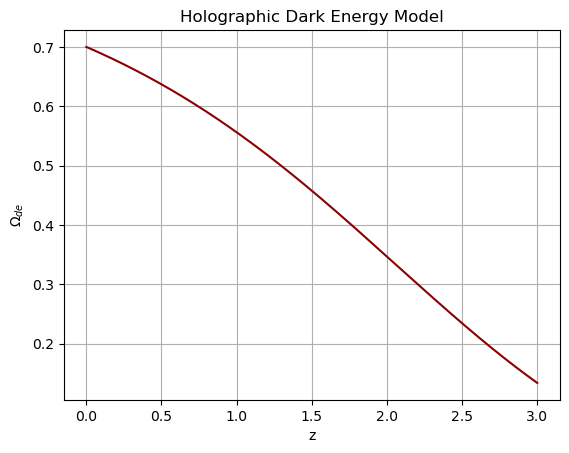

In [9]:
'''
Holographic Dark Energy Model with interactions 
'''

#Right hand side of the equations
def RHS_a_hdei(Omega, a, ci=0.8, b2i=0.1):
    dOmegaI = -Omega*(Omega-1)*(1+ 2*np.sqrt(Omega)/ci)/a - (3*Omega*b2i)*(1/a)
    return dOmegaI

def fun_rooti(Omega_0, ci=0.8, Ode0=0.7, b2i=0.1):
    a_hde = np.linspace(1./(1+3), 1, 500)
    result_a_hdei = odeint(RHS_a_hdei, Omega_0*10**(-5), a_hde, args=(ci,b2i))
    return result_a_hdei[-1] - Ode0

si = optimize.newton(fun_rooti, 1)

z = np.linspace(3,0,500)

sol_hdei =odeint(RHS_a_hdei, si*10**(-5), np.linspace(1./(1+3), 1, 500), args=(0.8,0.1))

plt.plot(z, sol_hdei,color='darkred',)
plt.grid()
plt.xlabel('z')
plt.ylabel('$\Omega_{de}$')
plt.title('Holographic Dark Energy Model')
print('The initial value at z=3 is ', float(sol_hdei[0]))

In [10]:
1./(1+3)

0.25

In [11]:
''' 
Shooting method to find initial values 

'''





' \nShooting method to find initial values \n\n'